# Отток клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Построить модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверить F1-меру на тестовой выборке самостоятельно.
Дополнительно измерить AUC-ROC, сравнить её значение с F1-мерой.

# Инструкция по выполнению проекта

**Шаг. 1 Загрузить и подготовить данные. Пояснить порядок действий.**

**Шаг. 2 Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.**

**Шаг. 3 Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.**

**Шаг. 4 Провести финальное тестирование.**

# Описание данных

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»). 

**Признаки**

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**

* Exited — факт ухода клиента

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle

In [2]:
try:
    data = pd.read_csv('C:\Data\Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')

# Шаг 1. Подготовка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
def check_columns(df):
    for column in df.columns:
        print('Уникальные значения столбца', column)
        print(df[column].unique())

check_columns(data)


Уникальные значения столбца RowNumber
[    1     2     3 ...  9998  9999 10000]
Уникальные значения столбца CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Уникальные значения столбца Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Уникальные значения столбца CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 61

In [7]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
data['Tenure'] = data['Tenure'].fillna(0)

In [9]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data['Tenure'].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

In [11]:
data.duplicated().sum() #дубликатов нет

0

**После анализа датафрейма мы пришли к выводу, что необходимо удалить столбца RowNumber, CustomerId и Surname. RowNumber - он повторяет значение индекса, начиная с единицы, CustomerId - никак не влияет на действия пользователя и в нём нет дубликатов, Surname - фамилия, а именно признак, который никак сильно не повлияет на то, останется ли человек в банке или нет**

In [12]:
data.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [13]:
data.shape

(10000, 14)

**Создадим новый датафрейм методом прямого кодирования (процесс, с помощью которого категориальные переменные преобразуются в подходящую алгоритмам Машинного обучения (ML) форму), чтобы избежать дамми-ловушек.**

In [14]:
new_data = pd.get_dummies(data, drop_first=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 2945 entries, RowNumber to Gender_Male
dtypes: float64(3), int64(8), uint8(2934)
memory usage: 28.8 MB


**Вывод по Шагу 1. Данные готовы к исследованию. Мы удалили три ненужных столбца, а именно, RowNumber, CustomerId и Surname, поскольку они сильно не влияют на исследования. Дубликатов в датафрейме нет, нулевые значения заменили нулями.**

# Шаг 2. Исследование задачи

**В данном исследовании мы будем использовать 3 модели, а именно DecisionTree (решющее дерево) RandomForest (случайный лес) LogisticRegression (логистическую регрессию)** 

In [15]:
target = new_data['Exited']
features = new_data.drop(['Exited'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=20052020) #делим выборку на тренировочную и валидационную
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=20052020) #делим выборку на тестовую и валидационную

print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)


(6000, 2944) (2000, 2944) (2000, 2944)
(6000,) (2000,) (2000,)


**Посмотрим, существует ли в выборке дисбаланс классов.**

In [16]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
7963 / 2037

3.9091801669121256

**Соотношение классов 1 к 4. Продолжим изучать модель без исправления баланса классов по условию задачи.**

**Модель решающего дерева DecisionTreeClassifier**

In [18]:
%%time

for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=20052020, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Максимальная глубина', depth, 'F1:', f1_score(target_valid, predicted_valid))

Максимальная глубина 2 F1: 0.5247813411078718
Максимальная глубина 3 F1: 0.5514285714285715
Максимальная глубина 4 F1: 0.49185667752443
Максимальная глубина 5 F1: 0.5405405405405405
Максимальная глубина 6 F1: 0.5905292479108636
Максимальная глубина 7 F1: 0.6107290233837688
Максимальная глубина 8 F1: 0.5678321678321679
Максимальная глубина 9 F1: 0.6080206985769728
Максимальная глубина 10 F1: 0.5608465608465607
Максимальная глубина 11 F1: 0.5953002610966057
Максимальная глубина 12 F1: 0.5790139064475347
Максимальная глубина 13 F1: 0.5786163522012578
Максимальная глубина 14 F1: 0.575031525851198
Максимальная глубина 15 F1: 0.5861635220125786
Максимальная глубина 16 F1: 0.5721455457967378
Максимальная глубина 17 F1: 0.581453634085213
Максимальная глубина 18 F1: 0.57465495608532
Максимальная глубина 19 F1: 0.5678704856787048
Максимальная глубина 20 F1: 0.5610062893081761
Максимальная глубина 21 F1: 0.5786163522012578
Максимальная глубина 22 F1: 0.5685785536159601
Максимальная глубина 23 F1:

**Лучший результат был на глубине - 7.**

**Рассмотрим модель случайного леса на разном числе деревьев.**

In [19]:
%%time

for est in range(50, 300, 10):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N-estimators', est, f1_score(target_valid, predicted_valid))

N-estimators 50 0.4850498338870432
N-estimators 60 0.5016501650165015
N-estimators 70 0.5098039215686274
N-estimators 80 0.5065359477124184
N-estimators 90 0.5122349102773247
N-estimators 100 0.5121555915721232
N-estimators 110 0.5098039215686274
N-estimators 120 0.5065789473684211
N-estimators 130 0.500823723228995
N-estimators 140 0.5049180327868853
N-estimators 150 0.5057471264367817
N-estimators 160 0.5114754098360655
N-estimators 170 0.49751243781094534
N-estimators 180 0.49419568822553894
N-estimators 190 0.49586776859504134
N-estimators 200 0.49751243781094534
N-estimators 210 0.49419568822553894
N-estimators 220 0.4966887417218543
N-estimators 230 0.5024793388429751
N-estimators 240 0.49834983498349844
N-estimators 250 0.49917355371900823
N-estimators 260 0.5032894736842106
N-estimators 270 0.5016501650165015
N-estimators 280 0.5057471264367817
N-estimators 290 0.500823723228995
CPU times: user 5min 44s, sys: 2.41 s, total: 5min 47s
Wall time: 5min 47s


**Лучшее число деревьев (90) было получено со значением 0,5122. Проведём исследование с 1 шагом.**

In [30]:
%%time

for est in range(90, 100, 1):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('N-estimators', est, 'F1', f1_score(target_valid, predicted_valid))

N-estimators 90 F1 0.5122349102773247
N-estimators 91 F1 0.5217391304347827
N-estimators 92 F1 0.5138211382113821
N-estimators 93 F1 0.5193548387096775
N-estimators 94 F1 0.5138211382113821
N-estimators 95 F1 0.5201938610662359
N-estimators 96 F1 0.5073649754500819
N-estimators 97 F1 0.5258064516129033
N-estimators 98 F1 0.511400651465798
N-estimators 99 F1 0.5193548387096775
CPU times: user 1min 17s, sys: 1.06 s, total: 1min 18s
Wall time: 1min 19s


**Лучший результат был достигнут  с числом деревьев 97 со значением 0.5258**

**Перейдём к логистической регрессии LogisticRegressionClassifier**

In [31]:
%%time

model =  LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1-score', f1_score(target_valid, predicted_valid))

F1-score 0.0
CPU times: user 355 ms, sys: 128 ms, total: 483 ms
Wall time: 458 ms


**Результаты работы модели довольно низкие, точнее равны нулю. Скорее всего это произошло из-за низкого precision или recall. Возможно они близки к нулвому значению.**

**Теперь проведем оценку accuracy, precision и recall, также отобразим F-меру**

In [32]:
%%time

model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Модель решающего дерева')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=90)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Модель случайного леса')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Модель логиcтической регрессии')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

Модель решающего дерева
Точность попадания по классам 0.8585
Precision 0.75
Recall 0.5150812064965197
Accuracy 0.8585
F1_score 0.6107290233837688

Модель случайного леса
Точность попадания по классам 0.8505
Precision 0.8626373626373627
Recall 0.3642691415313225
Accuracy 0.8505
F1_score 0.5122349102773247

Модель логиcтической регрессии
Точность попадания по классам 0.7845
Precision 0.0
Recall 0.0
Accuracy 0.7845
F1_score 0.0

CPU times: user 8.21 s, sys: 336 ms, total: 8.54 s
Wall time: 8.48 s


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Постороим ROC-линию для каждой модели и выведем показатель ROC-AUC.**

ROC_AUC DecisionTreeClassifier 0.8304009381298623
ROC_AUC RandomForestClassifier 0.8379034631247237
ROC_AUC LogisticRegression 0.5700721194725533


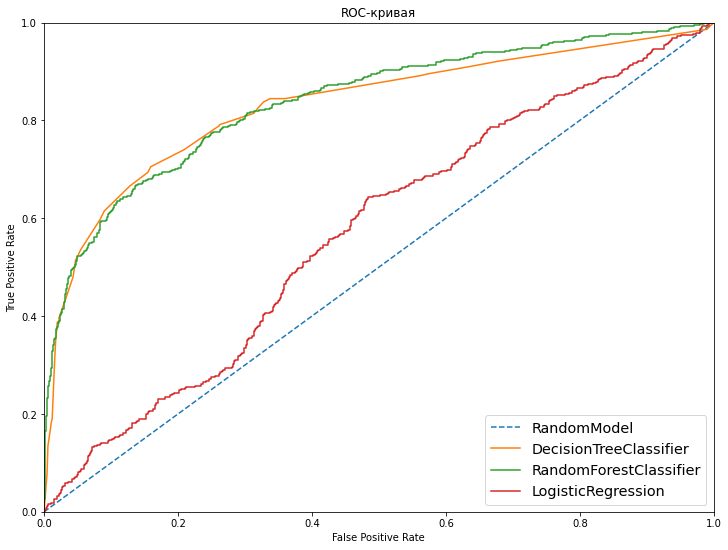

In [33]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC_AUC DecisionTreeClassifier', auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=20052020, max_depth=90)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC_AUC RandomForestClassifier', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC_AUC LogisticRegression', auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right', fontsize='x-large')

plt.title('ROC-кривая')
plt.show()

**Исходя из вышеполученного графика, можно сказать, что метрика f1 и ROC-AUC лучшие на модели RandomRofestClassifier.**

**Вывод по шагу 2.**

* В данных существует дисбаланс классов с соотношением 1 к 4.
* Скорее всего, дисбаланс классов влияет на качество моделей.
* Все модели имеют ниже recall чем precision из-за перекоса данных, что в итоге, влияет на f1-меру.

# Шаг 3. Борьба с дисбалансом

Чтобы убрать дисбаланс классов, выполним сравнение моделей:

* Со взвешенными классами
* С увеличенной выборкой
* С уменьшенной выборкой

**Изучим возможности моделей по взвешиванию классов**

In [34]:
%%time

model = DecisionTreeClassifier(random_state=20052020, max_depth=7, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Модель решающего дерева')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=90, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Модель случайного леса')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20052020, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Модель логиcтической регрессии')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))

Модель решающего дерева
Точность попадания по классам 0.7575
Precision 0.46175637393767704
Recall 0.7563805104408353
Accuracy 0.7575
F1_score 0.573438874230431

Модель случайного леса
Точность попадания по классам 0.8385
Precision 0.8552631578947368
Recall 0.30162412993039445
Accuracy 0.8385
F1_score 0.4459691252144083

Модель логиcтической регрессии
Точность попадания по классам 0.709
Precision 0.4005270092226614
Recall 0.7053364269141531
Accuracy 0.709
F1_score 0.5109243697478991
CPU times: user 8.18 s, sys: 318 ms, total: 8.5 s
Wall time: 8.47 s


**Из вышеприведённых данных видно, что F1-мера упала у модели решающего дерева (0.59 и 0.53) и случайного леса (0.49 и 0.47) и возрасла у логистической регрессии (0 и 0.5).**

**Изучим способ уменьшения класса 0.**

In [35]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=20052020)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=20052020)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=20052020)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

1    1202
0    1200
Name: Exited, dtype: int64


In [37]:
%%time

model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Модель решающего дерева')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=90)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Модель случайного леса')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print('Модель логиcтической регрессии')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))

Модель решающего дерева
Точность попадания по классам 0.7615
Precision 0.46607669616519176
Recall 0.7331786542923434
Accuracy 0.7615
F1_score 0.569882777276826

Модель случайного леса
Точность попадания по классам 0.776
Precision 0.4872944693572496
Recall 0.7563805104408353
Accuracy 0.776
F1_score 0.5927272727272728

Модель логиcтической регрессии
Точность попадания по классам 0.701
Precision 0.3933588761174968
Recall 0.7146171693735499
Accuracy 0.701
F1_score 0.5074135090609555
CPU times: user 3.2 s, sys: 248 ms, total: 3.45 s
Wall time: 3.41 s


**Из вышеприведённых данных видно, что F1-мера упала у модели решающего дерева (0.59 и 0.54), выросла у случайного леса (0.49 и 0.57) и также возрасла у логистической регрессии (0 и 0.48).**

**Изучим способ увеличения класса 1.**

In [38]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=20052020)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

1    4808
0    4798
Name: Exited, dtype: int64


In [39]:
%%time

model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Модель решающего дерева')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=90)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Модель случайного леса')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('Модель логиcтической регрессии')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('Accuracy', accuracy_score(target_valid, predicted_valid))
print('F1_score', f1_score(target_valid, predicted_valid))

Модель решающего дерева
Точность попадания по классам 0.7575
Precision 0.46175637393767704
Recall 0.7563805104408353
Accuracy 0.7575
F1_score 0.573438874230431

Модель случайного леса
Точность попадания по классам 0.8575
Precision 0.7570422535211268
Recall 0.4988399071925754
Accuracy 0.8575
F1_score 0.6013986013986015

Модель логиcтической регрессии
Точность попадания по классам 0.707
Precision 0.39869281045751637
Recall 0.7076566125290024
Accuracy 0.707
F1_score 0.5100334448160535
CPU times: user 13.4 s, sys: 460 ms, total: 13.9 s
Wall time: 13.8 s


**Из вышеприведённых данных видно, что F1-мера упала у модели решающего дерева (0.59 и 0.54), выросла у случайного леса (0.49 и 0.57) и также возрасла у логистической регрессии (0 и 0.49).**

ROC_AUC DecisionTreeClassifier 0.8309954025130168
ROC_AUC RandomForestClassifier 0.8511192048964937
ROC_AUC LogisticRegression 0.7549564577020845


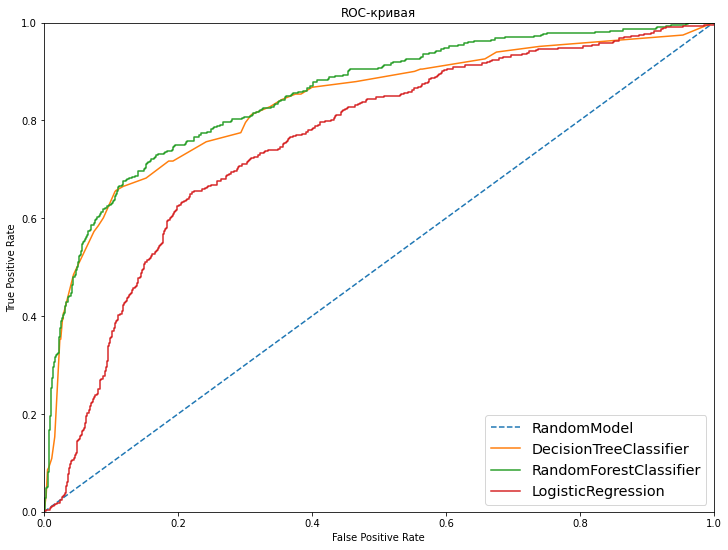

In [40]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = DecisionTreeClassifier(random_state=20052020, max_depth=7)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC_AUC DecisionTreeClassifier', auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

model = RandomForestClassifier(random_state=20052020, max_depth=90)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC_AUC RandomForestClassifier', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

model = LogisticRegression(random_state=20052020, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('ROC_AUC LogisticRegression', auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right', fontsize='x-large')

plt.title('ROC-кривая')
plt.show()

**Вывод по 3 шагу:**

* Дисбаланс классов приводил к ухудшению моделей. Наилучшим способом решения данной проблемы стал увеличение класса 1 в тренировочной выборке.

* Выравнивание классов привело к росту F1-меры, к росту гиперпараметров recall и падению гиперпараметра precision.

# Шаг 4. Тестирование модели

**Применим к тестовой выборке модель случайного. Займёмся исследованием гиперпараметров и улучшим F1-меру модели.**

In [41]:
%%time

for est in range(10, 500, 10):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N-estimators', est, 'F1', f1_score(target_valid, predicted_valid))

N-estimators 10 F1 0.5346534653465347
N-estimators 20 F1 0.5593220338983051
N-estimators 30 F1 0.5938375350140056
N-estimators 40 F1 0.6041958041958042
N-estimators 50 F1 0.598314606741573
N-estimators 60 F1 0.6008344923504869
N-estimators 70 F1 0.6016713091922007
N-estimators 80 F1 0.5986013986013986
N-estimators 90 F1 0.6013986013986015
N-estimators 100 F1 0.6019690576652602
N-estimators 110 F1 0.6097902097902098
N-estimators 120 F1 0.610878661087866
N-estimators 130 F1 0.60748959778086
N-estimators 140 F1 0.6063977746870655
N-estimators 150 F1 0.6083333333333334
N-estimators 160 F1 0.6033519553072626
N-estimators 170 F1 0.6063977746870655
N-estimators 180 F1 0.6055555555555555
N-estimators 190 F1 0.6104972375690608
N-estimators 200 F1 0.6115702479338843
N-estimators 210 F1 0.6077348066298343
N-estimators 220 F1 0.606896551724138
N-estimators 230 F1 0.6049723756906078
N-estimators 240 F1 0.6085753803596128
N-estimators 250 F1 0.6058091286307054
N-estimators 260 F1 0.6132596685082873


**Наилучший диапазон - 290-300**

In [43]:
%%time

for est in range(290, 300, 1):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('N-estimators', est, 'F1', f1_score(target_valid, predicted_valid))

N-estimators 290 F1 0.6151724137931034
N-estimators 291 F1 0.6153846153846153
N-estimators 292 F1 0.6132596685082873
N-estimators 293 F1 0.6126373626373627
N-estimators 294 F1 0.6141078838174274
N-estimators 295 F1 0.6134800550206329
N-estimators 296 F1 0.6141078838174274
N-estimators 297 F1 0.6160220994475138
N-estimators 298 F1 0.6141078838174274
N-estimators 299 F1 0.6124137931034482
CPU times: user 6min 41s, sys: 2.07 s, total: 6min 43s
Wall time: 6min 44s


**Наилучший F1 при числе деревьев - 297**

In [45]:
%%time

model = RandomForestClassifier(random_state=20052020, n_estimators=297, criterion='entropy')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('N-estimators', est, 'F1', f1_score(target_valid, predicted_valid))

N-estimators 299 F1 0.6130374479889042
CPU times: user 38.9 s, sys: 220 ms, total: 39.1 s
Wall time: 39.1 s


**Изменим параметр min_samples_split**

In [46]:
%%time

for samples_split in range(1, 11):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split = samples_split/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split/10, 'F1', f1_score(target_valid, predicted_valid))
    
for samples_split in range(2, 11):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split = samples_split)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_split', samples_split, 'F1', f1_score(target_valid, predicted_valid))    

Samples_split 0.1 F1 0.598690364826941
Samples_split 0.2 F1 0.5804132973944295
Samples_split 0.3 F1 0.5731814198071867
Samples_split 0.4 F1 0.5626643295354953
Samples_split 0.5 F1 0.568141592920354
Samples_split 0.6 F1 0.5658709106984969
Samples_split 0.7 F1 0.3545865898807075
Samples_split 0.8 F1 0.3545865898807075
Samples_split 0.9 F1 0.3545865898807075
Samples_split 1.0 F1 0.3545865898807075
Samples_split 2 F1 0.6124137931034482
Samples_split 3 F1 0.6021798365122616
Samples_split 4 F1 0.6077348066298343
Samples_split 5 F1 0.6222826086956522
Samples_split 6 F1 0.6253298153034301
Samples_split 7 F1 0.6240208877284595
Samples_split 8 F1 0.620599739243807
Samples_split 9 F1 0.6157760814249363
Samples_split 10 F1 0.6339622641509435
CPU times: user 6min 24s, sys: 2.95 s, total: 6min 27s
Wall time: 6min 27s


**Лучшее F1 при min_samples_split - 10 с 0.63396.**

**Изменим параметр min_samples_leaf**

In [47]:
%%time

for samples_leaf in range(1, 6):
    model =  RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split=10, 
                                    min_samples_leaf=samples_leaf/10)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf/10,'F1', f1_score(target_valid, predicted_valid))
    
for samples_leaf in range(1, 11):
    model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split=10,
                                  min_samples_leaf=samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Samples_leaf', samples_leaf, 'F1', f1_score(target_valid, predicted_valid))    

Samples_leaf 0.1 F1 0.5619546247818499
Samples_leaf 0.2 F1 0.5124792013311149
Samples_leaf 0.3 F1 0.5159744408945686
Samples_leaf 0.4 F1 0.3545865898807075
Samples_leaf 0.5 F1 0.3545865898807075
Samples_leaf 1 F1 0.6339622641509435
Samples_leaf 2 F1 0.6272912423625255
Samples_leaf 3 F1 0.6090373280943026
Samples_leaf 4 F1 0.5960637300843487
Samples_leaf 5 F1 0.5747960108794198
Samples_leaf 6 F1 0.5709188224799286
Samples_leaf 7 F1 0.5630550621669627
Samples_leaf 8 F1 0.5666666666666667
Samples_leaf 9 F1 0.5580985915492958
Samples_leaf 10 F1 0.5612788632326821
CPU times: user 1min 49s, sys: 1.91 s, total: 1min 51s
Wall time: 1min 51s


**Лучший показатель min_samples_leaf - 1, со значением 0.6339**

**Проверим на тестовой выборке три модели на дисбалансированных и сбалансированных данных:, со взвешанными классами, с усечённым 0 классом и расширенным 1 классом**

In [49]:
model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Модель случайного леса - дисбаланс классов')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('Accuracy', accuracy_score(target_test, predicted_test))
print('F1_score', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Модель случайного леса - взвешенные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('Accuracy', accuracy_score(target_test, predicted_test))
print('F1_score', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split=10,
                                   min_samples_leaf=1)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
print('Случайный лес - уменьшенное количество классов 0')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

model = RandomForestClassifier(random_state=20052020, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('Модель случайного леса - увеличенное количество классов 1')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('Accuracy', accuracy_score(target_test, predicted_test))
print('F1_score', f1_score(target_test, predicted_test))
print()

Модель случайного леса - дисбаланс классов
Точность попадания по классам 0.855
Precision 0.8653846153846154
Recall 0.3341584158415842
Accuracy 0.855
F1_score 0.48214285714285715

Модель случайного леса - взвешенные классы
Точность попадания по классам 0.855
Precision 0.7095588235294118
Recall 0.4777227722772277
Accuracy 0.855
F1_score 0.5710059171597632

Случайный лес - уменьшенное количество классов 0
Точность попадания по классам 0.768
Precision 0.4539877300613497
Recall 0.7326732673267327
F1 0.5606060606060606

Модель случайного леса - увеличенное кличество классов 1
Точность попадания по классам 0.8525
Precision 0.6666666666666666
Recall 0.5396039603960396
Accuracy 0.8525
F1_score 0.5964432284541724



In [ ]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('ROC_AUC RandomForestClassifier - disbalanced', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - disbalanced')

model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('ROC_AUC RandomForestClassifier - balanced by class weight', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by class weight')

model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1)
model.fit(features_downsampled, target_downsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('ROC_AUC RandomForestClassifier - balanced by reduce 0 class', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by reduce 0 class')

model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_split=10,
                              min_samples_leaf=1)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('ROC_AUC RandomForestClassifier - balanced by 1 class', auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - balanced by 1 class')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right', fontsize='x-large')

plt.title('ROC-кривая')
plt.show()

**Вывод по Шагу 4.**

* Модели 2 и 4 достигли максимальной F1-меры, а именно, модель случайного леса RandomForest со взешанными классами и модель случайного леса RandomForest с увеличенным 1 классом.

* Взвешивание классов помогает улучшать модели. Выравнивание классов привело к росту F1-меры, к росту гиперпараметров recall и падению гиперпараметра precision.

* Если говорить об оценке адекватности модели, то 1я модель (RandomForest с дисбаланосом) и 3я модель (RandomForest с увеличенным 1 классом) примерно одинаково показывают вероятность ухода клиента.

* Нами была получена наилучшая модель предсказания, а именно - модель случайного леса RandomForest с увеличенным  классом 1.

# Общий вывод:

**В ходе выполнения проекта нами были сделаны следующие шаги:**

* Шаг 1. Мы удалили три ненужных столбца, а именно, RowNumber, CustomerId и Surname, поскольку они сильно не влияют на исследования. Дубликатов в датафрейме нет, нулевые значения заменили нулями.

* Шаг 2. Изучили дисбаланс классов (1 к 4). Предположили, что дисбаланс классов влияет на качество моделей, что подтвердилось в следующих шагах. Выявили,ч то все модели имеют ниже recall чем precision из-за перекоса данных, что в итоге, влияет на f1-меру.

* Шаг 3. Подтвердили, что дисбаланс классов приводил к ухудшению моделей. Наилучшим способом решения данной проблемы стал увеличение класса 1 в тренировочной выборке. Выяснили, что выравнивание классов привело к росту F1-меры, к росту гиперпараметров recall и падению гиперпараметра precision.

* Шаг 4. Выявили наилучшую модель, а именно RandomForrest со сбалансированными классами. Данная модель имеет достаточную адекватность, подтверждёнными данными ROC-AUC - 0.84. Точность попадания по классам довольно высокий = 0.841. Precision = 0.687, Recall = 0.456, Accuracy = 0.841, F1_score = 0.541

# Шаг 5. Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*